## Homework 3 AIMDA
0. Given the time series (gold.dlm) of prices for gold.
1. Construct the neural network for forecasting 
2. Define the length of "input window" (the number of input values for neural network) 
3. Try different numbers of neurons in hidden layer 
4. Perform the forecasting
5. Define the efficient forecasting horizon (number of forecasted values with an appropriate error)
6. Make conclusions on the results of forecasting using different lengths of "input window" and numbers of neurons in hidden layer

### Summary

We download the dataset, explored its data and prepared it for statistical tasks. The date had to be adapted, an index was set and the dates were adjusted to a running time series. Later, a linear regression was fitted to verify if the dataset is suited of a regression task. For this, a training and a test set were generated (80/20). The result was that the first dataset achieved better results. This was used to feed the neural network. The "input window" was the training dataset with 1771 labels and 448 labels for the test set or the "efficient forecasting horizon". A total of 100 neurons was used and remained fixed. The epochs were adjusted accordingly and later optimized.

### Conclusions
For this task, both the dataset and the model were not adecquate. The set was too small and for the type of task, a linear regression would have been sufficient. Moreover, neural networks are better suited for classification than for regression tasks.

In [ ]:
#Lets download the necessary dataset
!wget https://www.dropbox.com/s/wu430seilidbxr5/gold.dlm?dl=0

In [196]:
#import the necessary libraries to work with
import pandas as pd

import numpy as np
import cPickle as pickle
from math import sqrt
from pybrain.datasets.supervised import SupervisedDataSet as SDS
from sklearn.metrics import mean_squared_error as MSE
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [165]:
#parse the file that we just downloaded into a dataframe
df = pd.read_csv('gold.dlm?dl=0', engine='python', delimiter=r'\t', date_parser=True)

In [166]:
#lets take a look at the columns of the  dataframe
print(df.columns)
df.head()

Index([u'Date', u'Close'], dtype='object')


,Date,Close
0,13.02.2015,1223.7
1,12.02.2015,1220.7
2,11.02.2015,1219.6
3,10.02.2015,1232.2
4,09.02.2015,1241.5


In [167]:
#we see that the date is not in a standard format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df.set_index(df["Date"],inplace=True)
print(df.columns)
df.head()

Index([u'Date', u'Close'], dtype='object')


,Date,Close
Date,,
2015-02-13,2015-02-13,1223.7
2015-02-12,2015-02-12,1220.7
2015-02-11,2015-02-11,1219.6
2015-02-10,2015-02-10,1232.2
2015-02-09,2015-02-09,1241.5


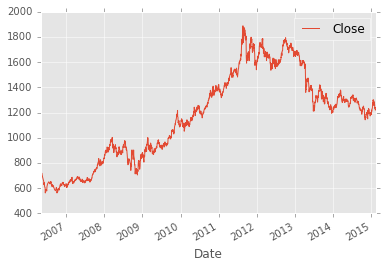

In [168]:
#lets view how the data looks like
plt.figure(); df.plot();

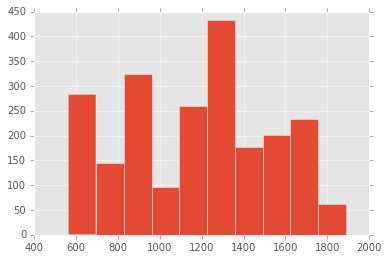

In [169]:
# Make a histogram of closing prices
plt.hist(df['Close'])

# Show the plot.
plt.figure(); plt.show()

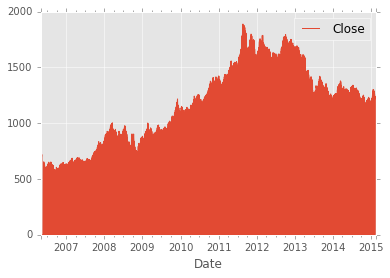

In [172]:
#we need to sample on a day level to reduce variability
df2 = df['Close'].resample('D', how='sum')
df2 = pd.DataFrame(df2)
df2['Date'] = df2.index
df2.set_index(df2["Date"],inplace=True)
#maybe some weeks are missing, we need to encode those values with something
df2 = df2.fillna(0)
df2.plot()

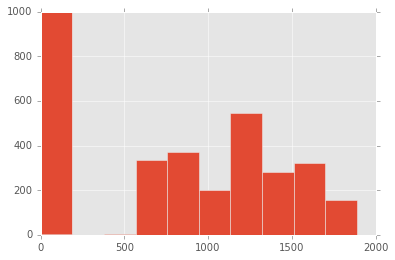

In [173]:
# Make a histogram of closing prices on a day level
plt.hist(df2['Close'])

# Now we see that the values are heavily condensced and that we had some missing values (0s)
plt.figure(); plt.show()

In [174]:
#we see that only Close is being considered for the correlation
df2.corr()

,Close
Close,1


In [175]:
df2.head()

,Close,Date
Date,,
2006-05-01,657.5,2006-05-01
2006-05-02,664.7,2006-05-02
2006-05-03,665.9,2006-05-03
2006-05-04,0.0,2006-05-04
2006-05-05,0.0,2006-05-05


In [182]:
# Generate the training set.  Set random_state to be able to replicate results.
df_train = df.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
df_test = df.loc[~df.index.isin(train.index)]
# Print the shapes of both sets.
print(df_train.shape)
print(df_test.shape)

(1771, 2)
(448, 2)


('Coefficients: \n', array([ 0.28036801]))
Residual sum of squares: 115242.81
Variance score: -0.03


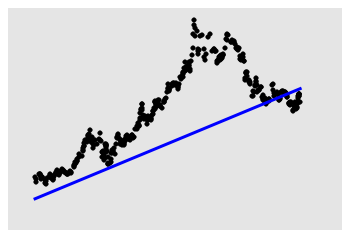

In [190]:
X = (df_train.index -  df_train.index[0]).days.reshape(-1, 1)

y = df_train['Close'].values

X_predict = (df_test.index -  df_test.index[0]).days.reshape(-1, 1)

y_predict = df_test['Close'].values

#Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_predict) - y_predict) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_predict, y_predict))

# Plot outputs
plt.scatter(X_predict, y_predict,  color='black')
plt.plot(X_predict, regr.predict(X_predict), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [184]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = df2.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df2.loc[~df2.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(2569, 2)
(642, 2)


('Coefficients: \n', array([ 0.25996035]))
Residual sum of squares: 921024.59
Variance score: -1.53


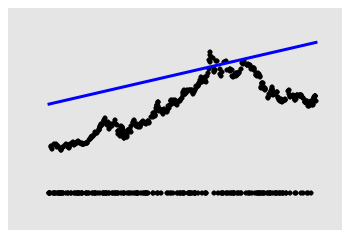

In [191]:
df2_X = (train.index -  train.index[0]).days.reshape(-1, 1)

df2_y = train['Close'].values

df2_X_predict = (test.index -  test.index[0]).days.reshape(-1, 1)

df2_y_predict = test['Close'].values

#Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df2_X, df2_y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(df2_X_predict) - df2_y_predict) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(df2_X_predict, df2_y_predict))

# Plot outputs
plt.scatter(df2_X_predict, df2_y_predict,  color='black')
plt.plot(df2_X_predict, regr.predict(df2_X_predict), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

We can see that there is a linear relation in our data. However, resampling and adding 0s for the NAs does not help improve the model. Variance and RSS is smaller using the original set

In [194]:
X_predict.shape[]

1

In [202]:
#train a regression on a neural network with pybrain

#train_file = train
#validation_file = test
output_model_file = 'model.pkl'

hidden_size = 100
epochs = 600

# load data

#train = np.loadtxt( train_file, delimiter = ',' )
#validation = np.loadtxt( validation_file, delimiter = ',' )
#train = np.vstack(( train, validation ))

x_train = X
y_train = y
y_train = y_train.reshape( -1, 1 )

input_size = 1 #x_train.shape[0]
target_size = 1 #y_train.shape[1]

# prepare dataset

ds = SDS( input_size, target_size )
ds.setField( 'input', x_train )
ds.setField( 'target', y_train )

# init and train

net = buildNetwork( input_size, hidden_size, target_size, bias = True )
trainer = BackpropTrainer( net,ds )

print "training for {} epochs...".format( epochs )

for i in range( epochs ):
    mse = trainer.train()
    rmse = sqrt( mse )
    print "training RMSE, epoch {}: {}".format( i + 1, rmse )

pickle.dump( net, open( output_model_file, 'wb' ))


training for 600 epochs...
training RMSE, epoch 1: 290.652812598
training RMSE, epoch 2: 275.356497565
training RMSE, epoch 3: 271.671970916
training RMSE, epoch 4: 265.176836902
training RMSE, epoch 5: 268.638831549
training RMSE, epoch 6: 266.142497879
training RMSE, epoch 7: 272.428942237
training RMSE, epoch 8: 270.479100741
training RMSE, epoch 9: 270.364878106
training RMSE, epoch 10: 272.978051436
training RMSE, epoch 11: 268.76835856
training RMSE, epoch 12: 269.671298969
training RMSE, epoch 13: 266.274640726
training RMSE, epoch 14: 267.587458563
training RMSE, epoch 15: 266.925083542
training RMSE, epoch 16: 268.845481402
training RMSE, epoch 17: 267.861258823
training RMSE, epoch 18: 271.572999392
training RMSE, epoch 19: 266.108929936
training RMSE, epoch 20: 268.098058522
training RMSE, epoch 21: 267.636765597
training RMSE, epoch 22: 267.520070431
training RMSE, epoch 23: 268.482027254
training RMSE, epoch 24: 264.50495066
training RMSE, epoch 25: 274.434089069
training 

In [204]:
#predict using the test set

model_file = 'model.pkl'
output_predictions_file = 'predictions.txt'

# load model

net = pickle.load( open( model_file, 'rb' ))

# load data
x_test = X_predict
y_test = y_predict
y_test = y_test.reshape( -1, 1 )

# you'll need labels. In case you don't have them...
y_test_dummy = np.zeros( y_test.shape )

input_size = x_test.shape[1]
target_size = y_test.shape[1]

assert( net.indim == input_size )
assert( net.outdim == target_size )

# prepare dataset

ds = SDS( input_size, target_size )
ds.setField( 'input', x_test )
ds.setField( 'target', y_test_dummy )

# predict

p = net.activateOnDataset( ds )
mse = MSE( y_test, p )
rmse = sqrt( mse )

print "testing RMSE:", rmse

np.savetxt( output_predictions_file, p, fmt = '%.6f' )


testing RMSE: 393.930497599


In [206]:
#identify the number of epochs required

output_model_file = 'model_val.pkl'

hidden_size = 100
epochs = 1000
continue_epochs = 10
validation_proportion = 0.15

# prepare dataset

ds = SDS( input_size, target_size )
ds.setField( 'input', x_train )
ds.setField( 'target', y_train )

# init and train

net = buildNetwork( input_size, hidden_size, target_size, bias= True )
trainer = BackpropTrainer( net,ds )

train_mse, validation_mse = trainer.trainUntilConvergence( 
    verbose = True, validationProportion = validation_proportion, 
    maxEpochs = epochs, continueEpochs = continue_epochs )

pickle.dump( net, open( output_model_file, 'wb' ))


train-errors: [  72062.737874  73934.453229  72979.652732  76728.815031  74911.953158  76303.637499  74992.676990  71337.167462  73118.705633  75792.691688  75171.517682  73187.061756  76337.833532  76340.450833  75645.239064  74972.036437  72459.098106  74320.668470  74993.041586  75492.099168  76126.256271  74501.478533  76124.514939  73144.914285  76361.560021  74457.303139  74557.552157  76366.963560  76809.090351  76121.735978  71596.810624  73007.174197  75482.682879  76301.607629  74917.316972  77477.089871  76443.449099  75702.715829  79146.714589  74647.996101  75797.810883  76470.194988  76041.746506  76046.588613  78481.378912  78552.879232  76490.827663  72495.912689  79538.735905  74020.570470  77414.579172  76120.183375  76732.237061  75287.531043  79808.649570  77284.863777  74151.382901  75126.076436  73423.583176  74176.743405  73941.558666  77173.559207  79819.491987  75373.035100  77008.208757  77449.817012  72931.741678  77152.379886  74538.542289  75429.410452  746